# Data Science Project- Loan Default Prediction


# Chapter 1: Introduction
The objective of this notebook is to assess the risk of MoneyLion applicants more accurately by predicting the loan risk or quality (loan repayment) on a given applicant. Simpler, the notebook will analyze the current data and build a model that will predict if the loan will go default.

Based on the datasets and guidelines, the model is implemented during the risk assessment of each applicant. The process is assumed to be applied after the underwriting process. The model may help MoneyLion in adding an extra filtering layer during the risk assessment to aid MoneyLion in making more informed decision.


# Chapter 2: Setup
Import the necessary libraries.

In [1]:
from utils import *
# Data Exploration 
import numpy as np
import pandas as pd
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', palette='Set2')

# Machine Learning
from sklearn.preprocessing import RobustScaler
from scipy.stats import boxcox
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from pdpbox import pdp


ModuleNotFoundError: No module named 'numpy'

# Chapter 3: Exploratory Data Analysis (EDA)
In this chapter, we will read the data and process the data if needed

## 3.0 Read Data

As we are not required to include the datasets in the submission, the file directory of personal computer is used.

In [292]:
# Read data
loan = pd.read_csv('C:/Users/Lun/DS Assessment/data/data/loan.csv', parse_dates=['applicationDate', 'originatedDate'])

# Display result
loan

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577677,LL-I-12122269,801262d04720d32040612759857f4147,B,590.0,2016-11-08T17:32:33.554000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1292.41,NV,bvMandatory,3,NaN,58220cdde4b051c58d919c1f,1
577678,LL-I-16183462,e37750de9d99a67e0fa96a51e86fdf5b,S,490.0,2017-01-24T22:20:59.818000,False,NaN,0.0,False,0,Withdrawn Application,1000.0,2592.39,MO,lead,25,NaN,5887d349e4b08f249ac45e2f,1
577679,LL-I-06962710,d7e55e85266208ac4c353f42ebcde5ca,B,590.0,2016-02-02T03:05:47.797000,False,NaN,0.0,False,0,Withdrawn Application,300.0,844.75,IN,bvMandatory,6,NaN,550b1f59e4b0d4592e28c84e,1
577680,LL-I-01253468,c3b35307cb36116bf59574f9138d3dad,B,550.0,2015-05-21T20:19:49.639000,False,NaN,0.0,False,0,Withdrawn Application,300.0,770.80,OH,organic,6,NaN,NaN,0


In [293]:
# Read data
clarity_underwriting_var = pd.read_csv('C:/Users/Lun/DS Assessment/data/data/clarity_underwriting_variables.csv')

# Display result 
clarity_underwriting_var 


,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,24.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,677.0,58cc5706e4b0b0437e26b19c
49748,6.0,4.0,1.0,4.0,11.0,4.0,1.0,4.0,17.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,16.0,640.0,58cc5763e4b0b0437e272d38
49749,4.0,4.0,1.0,4.0,4.0,4.0,1.0,4.0,5.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,576.0,58cc57d4e4b0b0437e278bff
49750,3.0,3.0,2.0,2.0,3.0,3.0,2.0,3.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,830.0,58cc5916e4b0b0437e2b6e07


In [294]:
# Read data
payment = pd.read_csv('C:/Users/Lun/DS Assessment/data/data/payment.csv', parse_dates=['paymentDate'])

# Display result 
payment

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
...,...,...,...,...,...,...,...,...,...
689359,LL-I-18629478,8,False,2017-07-14T04:00:00,45.62,17.67,63.29,NaN,NaN
689360,LL-I-18629478,9,False,2017-07-31T04:00:00,45.67,17.62,63.29,NaN,NaN
689361,LL-I-18629478,10,False,2017-08-15T04:00:00,51.12,12.17,63.29,NaN,NaN
689362,LL-I-18629478,11,False,2017-08-31T04:00:00,54.35,8.94,63.29,NaN,NaN


After reviewing the datasets, we found that `payment.csv` is not suitable to be included in the ML model training to **prevent target leakages**, so it will be excluded from further analysing. This is because in the real scenario, the applications are not yet to be approved, so it will not have access to the payment data stored in `payment.csv`. The data in `payment.csv` only occurred after the application is approved. 

## 3.1 Transform data
Preprocess and transform the data. We merge the loan dataset with clarity_underwriting_var based on the common identifier which is the id, and filter out the loan that is not ultimately funded. 

In [295]:
# merge loan with clarity_underwriting_var based on common identifier (id)
df = loan.merge(clarity_underwriting_var, left_on='clarityFraudId', right_on='underwritingid', how='left')

# Filter by funded loans
df = df[df['isFunded'] == 1]

# Display result
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,...,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,True,2016-11-29T20:30:40.640000,2.0,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,True,2017-03-01T16:15:13.016000,0.0,True,1,...,(U) Unlisted,match,NaN,NaN,NaN,NaN,match,1.0,658.0,58b6eef8e4b0b6fca82fd426
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,True,2017-01-31T18:00:14.520000,2.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,835.0,58450a15e4b0bb9d6d7344c7
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,True,2016-08-29T15:05:04.014000,0.0,True,1,...,(P) Pager,match,NaN,NaN,NaN,NaN,match,1.0,624.0,578f9346e4b0810ad5e7b72e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01T16:57:49.231000,True,2016-12-01T17:28:21.872000,3.0,True,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14T19:43:08.685000,True,2017-01-14T20:00:10.426000,0.0,True,1,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,700.0,587a7f49e4b08f2485d48358
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22T01:10:50.110000,True,2016-06-22T21:46:54.359000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,806.0,5769e592e4b0ab6c50364d45
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30T15:49:39.785000,True,2016-12-30T16:00:12.500000,0.0,True,1,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,769.0,58668211e4b08f246e282356


## Inspecting data types
We will look at the types of each column, inspect its nature and possibility of dropping it.

In [296]:
# Print summary of df columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38982 entries, 1 to 577662
Data columns (total 73 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   loanId                                                                                               38982 non-null  object 
 1   anon_ssn                                                                                             38982 non-null  object 
 2   payFrequency                                                                                         38982 non-null  object 
 3   apr                                                                                                  38982 non-null  float64
 4   applicationDate                                                                                      38982 non

The columns that is irrelevant to the analysis and ML model is dropped out as it contribute little to no significance.
* Based on `clarity_underwriting_dictionary.csv`, the description for clearFraudScore: **fraud score provided by clarity. Higher score suggests lower default probability**, shows that `clearFraudScore` is an overall indicator that summarize all the clear fraud traits. As fraud detection is not our main objective, this overall indicator is assumed to be sufficiently conclude the data from `clarity_underwriting_dictionary.csv`. **--> drop all underwriting columns, except `clearfraudscore`**.
* The purpose of `hasCF` column is unclear and not stated in the `guidelines`. After online research, we assume it to be "has Cash Flows", meaning it is whether the loan is generating cash flows after it is approved. We should exclude the column to prevent target leakage. In working scenario, it is suggested to ask for clarification before taking this decision. **--> drop `hasCF`**
* `fpStatus` is the result of first payment of the loan which is not available before the loan is approved. **--> drop `fpStatus`**
* `state` contains demographical data, and should be removed to prevent bias **--> drop `state`**
* Although `loanStatus` column seemed to be directly related with the risk. However, considering the loanStatus will not be available during the loan application, it will be dropped to prevent target leakage **--> drop `loanStatus`**


In [297]:
# Only retain relevant columns
df = df[['loanId',
         'anon_ssn',
         'payFrequency', 
         'apr', 
         'applicationDate', 
         'originatedDate', 
         'nPaidOff',
         'loanStatus', 
         'loanAmount', 
         'originallyScheduledPaymentAmount', 
         'leadType', 
         'leadCost', 
         'clearfraudscore']]

# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,leadType,leadCost,clearfraudscore
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,prescreen,0,879.0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,B,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,organic,0,NaN
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,W,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,lead,40,658.0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,S,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,organic,0,835.0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,B,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,bvMandatory,10,624.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,B,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,rc_returning,0,NaN
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,M,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,lead,25,700.0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,B,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,lead,40,806.0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,B,625.0,2016-12-30T15:49:39.785000,2016-12-30T16:00:12.500000,0.0,New Loan,600.0,1868.88,lead,25,769.0


## 3.2 Categorical variables encoding
Convert categorical variables to numerical format for ML model

After dropping the irrelevant columns, we can further inspect the data of each columns. `payFrequency` is ordinal variable (with meaningful order), `leadType` is nominal variable. 
* `payFrequency` will be applied with ordinal encoding
* `leadType` will be applied with one-hot encoding

In [298]:
print(df['payFrequency'].unique())
print(df['leadType'].unique())

['B' 'W' 'S' 'M' 'I']
['prescreen' 'organic' 'lead' 'bvMandatory' 'rc_returning' 'california'
 'instant-offer' 'express' 'repeat' 'lionpay']


In [299]:
# Ordinal encoding
df['payFrequency'] = df['payFrequency'].map({'W': 0, 
                                             'B': 1, 
                                             'S': 2,
                                             'M': 3,
                                             'I': 4})
# One-hot encoding
df = pd.get_dummies(df, columns=['leadType'], dtype=int)
# Display results
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,...,0,0,0,0,0,0,0,1,0,0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,1,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,...,0,0,0,0,0,0,1,0,0,0
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,0,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,...,0,0,0,0,1,0,0,0,0,0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,...,0,0,0,0,0,0,1,0,0,0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,...,0,0,0,0,0,0,0,0,1,0
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,...,0,0,0,0,1,0,0,0,0,0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,...,0,0,0,0,1,0,0,0,0,0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,1,625.0,2016-12-30T15:49:39.785000,2016-12-30T16:00:12.500000,0.0,New Loan,600.0,1868.88,...,0,0,0,0,1,0,0,0,0,0


## 3.2 Handling Missing Values

check if there is any blank values

In [300]:

def check_missing_values(df):
    """
    Function to check for missing values in a DataFrame and compute the percentage of missing values in each column.
    """
    # Calculate the total number of missing values in each column
    missing_values = df.isnull().sum()
    
    # Calculate the percentage of missing values in each column
    total_cells = df.shape[0]
    missing_percentage = (missing_values / total_cells) * 100
    
    # Create a DataFrame to store the results
    missing_values_df = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })
    
    missing_values_df = missing_values_df.sort_values(by='Percentage', ascending=False)

    return missing_values_df




In [301]:
check_missing_values(df)

,Missing Values,Percentage
clearfraudscore,6894,17.685085
nPaidOff,21,0.053871
leadType_bvMandatory,0,0.000000
leadType_rc_returning,0,0.000000
leadType_prescreen,0,0.000000
leadType_organic,0,0.000000
leadType_lionpay,0,0.000000
leadType_lead,0,0.000000
leadType_instant-offer,0,0.000000
leadType_express,0,0.000000


To handle the missing values in `clearFraudScore`, `nPaidOff`, and `fpStatus`, we need to first observe how the data are distributed by plotting the histograms.

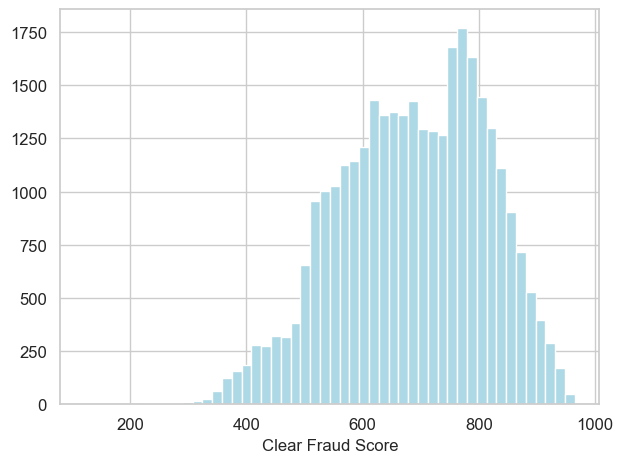

In [302]:
# Plot histogram of clearfraudscore
df['clearfraudscore'].plot(kind='hist', bins=50, color='lightblue')
plt.xlabel('Clear Fraud Score', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

A normal distribution with slightly negative skew is observed. In this case, we use **median** to fill the empty values so it is less affected by skewness and outliers, as well as preserving the central tendency.

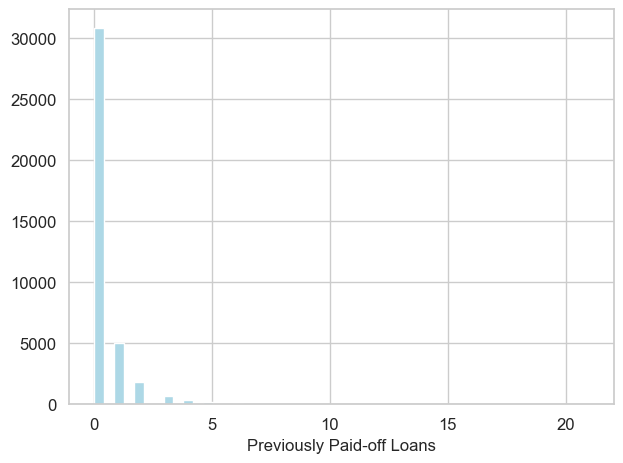

In [303]:
# Plot histogram of clearfraudscore
df['nPaidOff'].plot(kind='hist', bins=50, color='lightblue')
plt.xlabel('Previously Paid-off Loans', fontsize=12)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

It can be observed that the data are heavily clustered around 0, convincing us to use the **mode** to fill the missing values

Filling missing values with the suggested measures.

In [304]:
# Fill missing value with mean in clearfraudscore column
row_label1 = df['clearfraudscore'].isna()
df.loc[row_label1, 'clearfraudscore'] = df['clearfraudscore'].median()

# Fill missing value with mode in nPaidOff column
row_label2 = df['nPaidOff'].isna()
df.loc[row_label2, 'nPaidOff'] = df['nPaidOff'].mode()[0]

df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,leadType_bvMandatory,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,...,0,0,0,0,0,0,0,1,0,0
15,LL-I-12263369,accf40708233e8b7d05fcb89d5a9c081,1,475.0,2016-11-28T19:54:22.982000,2016-11-29T20:30:40.640000,2.0,New Loan,350.0,893.88,...,0,0,0,0,0,0,1,0,0,0
33,LL-I-17826953,7529d29c9d943cc55bc71a85d9c6b7a3,0,645.0,2017-03-01T15:55:41.823000,2017-03-01T16:15:13.016000,0.0,New Loan,400.0,1364.87,...,0,0,0,0,1,0,0,0,0,0
47,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,...,0,0,0,0,0,0,1,0,0,0
54,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,...,0,0,0,0,0,0,0,0,1,0
577590,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,...,0,0,0,0,1,0,0,0,0,0
577617,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,...,0,0,0,0,1,0,0,0,0,0
577653,LL-I-14178923,d9a63e9e15b862fcaaf3653c52e1f16c,1,625.0,2016-12-30T15:49:39.785000,2016-12-30T16:00:12.500000,0.0,New Loan,600.0,1868.88,...,0,0,0,0,1,0,0,0,0,0


# Chapter 4 Feature Engineering

Next, `loanStatus` column is important in providing the outcomes of loan applications, whether if the loan has defaulted. Implementing feature engineering to it improve the data quality for the ML model training.

In [305]:
percentage_counts = df['loanStatus'].value_counts(normalize=True).apply(lambda x: f'{x * 100:.2f}%')
print(percentage_counts)


loanStatus
Paid Off Loan                  29.31%
External Collection            29.07%
New Loan                       20.81%
Internal Collection            14.27%
Returned Item                   3.03%
Settlement Paid Off             1.82%
Settled Bankruptcy              0.83%
Pending Paid Off                0.43%
Charged Off Paid Off            0.41%
Charged Off                     0.00%
Settlement Pending Paid Off     0.00%
Name: proportion, dtype: object


For cleaner indication of outcome, we'll categorize the `loanStatus` into 2 outcomes, **POSITIVE (target ==1)** and **NEGATIVE (target ==0)**. POSITIVE outcome is favourable by MoneyLion and NEGATIVE outcome is what we need to avoid in the risk assessment, as it incurred loss on MoneyLion. 
- `Paid Off Loan`, `Settlement Paid Off` (target ==1) indicating the loan was settled and not getting defaulted, which is a favourable outcome.
- `Settled Bankruptcy`, `Charged Off` indicating the loan was defaulted, which is a unfavourable outcome.
- The others loan status are indicating the loan has not settled yet, which do not show any outcome. So, these will be excluded.

In this part, we are going to create a new `target` column with value of **0** and **1**, indicating **NEGATIVE** and **POSITIVE** outcome, respectively.

In [306]:
# Map loan status to the target column (0: negative outcome, 1: positive outcome)
def target_encoding(x):
    labels = {0: ['Settled Bankruptcy', 'Charged Off'],
              1: ['Paid Off Loan', 'Settlement Paid Off']}
    for label, status in labels.items():
        if x in status:
            return label
df['target'] = df['loanStatus'].map(target_encoding)

# Drop rows with no target label which neither have negative nor positive outcome
df = df[df['target'].notna()].reset_index(drop=True)

df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,leadType_california,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,target
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19T22:07:36.778000,2016-01-20T15:49:18.846000,0.0,Paid Off Loan,3000.0,6395.19,...,0,0,0,0,0,0,1,0,0,1.0
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31T17:48:17.381000,2017-01-31T18:00:14.520000,2.0,Paid Off Loan,1250.0,3313.78,...,0,0,0,0,0,1,0,0,0,1.0
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27T09:08:05.442000,2016-08-29T15:05:04.014000,0.0,Paid Off Loan,800.0,2432.08,...,0,0,0,0,0,0,0,0,0,1.0
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,0,404.1,2016-05-25T03:05:18.849000,2016-05-25T15:11:36.260000,3.0,Paid Off Loan,300.0,422.64,...,0,0,0,0,0,1,0,0,0,1.0
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,0,590.0,2015-05-26T17:02:27.312000,2015-05-26T18:45:48.024000,0.0,Paid Off Loan,300.0,896.87,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,1,645.0,2017-01-16T04:56:31.235000,2017-01-16T05:30:10.885000,0.0,Paid Off Loan,1500.0,5111.56,...,0,0,0,1,0,0,0,0,0,1.0
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01T16:57:49.231000,2016-12-01T17:28:21.872000,3.0,Paid Off Loan,600.0,1670.18,...,0,0,0,0,0,0,0,1,0,1.0
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14T19:43:08.685000,2017-01-14T20:00:10.426000,0.0,Paid Off Loan,375.0,1042.40,...,0,0,0,1,0,0,0,0,0,1.0
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22T01:10:50.110000,2016-06-22T21:46:54.359000,0.0,Paid Off Loan,400.0,664.12,...,0,0,0,1,0,0,0,0,0,1.0


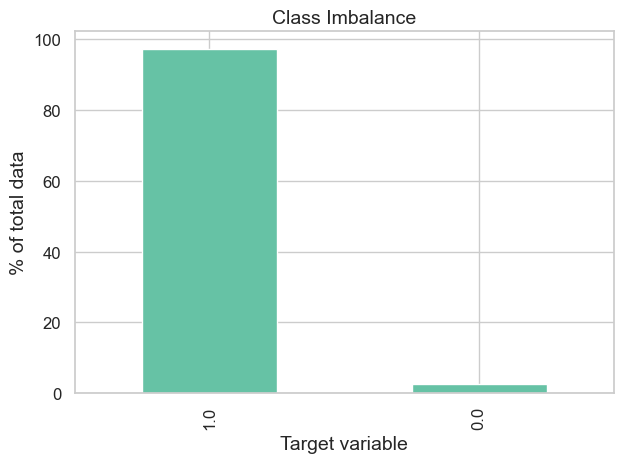

In [307]:
# construct class imbalance bar chart
df['target'].value_counts(normalize=True).apply(lambda x: round(x * 100, 2)).plot(kind='bar')
plt.title('Class Imbalance', fontsize=14)
plt.xlabel('Target variable', fontsize=14)
plt.ylabel('% of total data', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Obviously, the number of data with POSITIVE outcome is significantly more than NEGATIVE column. Additional processing might be needed.

## 4.1 Additional features

New additional features are engineered from the exisitng data. 

### Feature 1: `time_apply_to_originate`
This feature disclose the time taken for the loan to be originated, from the time it is applied. The time taken might be providing insights to the risk of the application.

In [308]:
# Convert 'applicationDate' and 'originatedDate' to datetime format
df['applicationDate'] = pd.to_datetime(df['applicationDate'], errors='coerce')
df['originatedDate'] = pd.to_datetime(df['originatedDate'], errors='coerce')

# Calculate time between applicationDate & originatedDate (hours)
df['time_apply_to_originate'] = (df['originatedDate'] - df['applicationDate']).dt.seconds / 3600

# Display results
df


,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,target,time_apply_to_originate
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,3000.0,6395.19,...,0,0,0,0,0,1,0,0,1.0,17.695000
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,Paid Off Loan,1250.0,3313.78,...,0,0,0,0,1,0,0,0,1.0,0.199167
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,800.0,2432.08,...,0,0,0,0,0,0,0,0,1.0,5.949444
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,0,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,Paid Off Loan,300.0,422.64,...,0,0,0,0,1,0,0,0,1.0,12.104722
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,0,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,Paid Off Loan,300.0,896.87,...,0,0,0,0,0,0,0,0,1.0,1.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,1,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,Paid Off Loan,1500.0,5111.56,...,0,0,1,0,0,0,0,0,1.0,0.560833
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,Paid Off Loan,600.0,1670.18,...,0,0,0,0,0,0,1,0,1.0,0.508889
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,Paid Off Loan,375.0,1042.40,...,0,0,1,0,0,0,0,0,1.0,0.283611
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,Paid Off Loan,400.0,664.12,...,0,0,1,0,0,0,0,0,1.0,20.601111


# Chapter 5: Data Visualization

In this part, data is visualized to provide more intuitive information and insights about the data, to aid in ML model development. 

Firstly, get the descriptive stats for  the features where descriptive stats values are meaningful.

In [309]:
df.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originatedDate', 'nPaidOff', 'loanStatus', 'loanAmount',
       'originallyScheduledPaymentAmount', 'leadCost', 'clearfraudscore',
       'leadType_bvMandatory', 'leadType_california', 'leadType_express',
       'leadType_instant-offer', 'leadType_lead', 'leadType_lionpay',
       'leadType_organic', 'leadType_prescreen', 'leadType_rc_returning',
       'leadType_repeat', 'target', 'time_apply_to_originate'],
      dtype='object')

In [310]:
# Create a copy for data visualization purpose
df_copy = df.copy()

# Get the descriptive stats for columns where descriptive stats values are meaningful
df_copy[['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost', 'clearfraudscore', 'time_apply_to_originate']].describe()

,apr,nPaidOff,loanAmount,originallyScheduledPaymentAmount,leadCost,clearfraudscore,time_apply_to_originate
count,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12461.000000,12438.000000
mean,508.946662,0.590081,629.297007,1661.688210,12.109863,709.577482,7.034490
std,117.319897,1.389716,451.761168,1202.830803,24.749500,115.983220,7.634345
min,0.000000,0.000000,100.000000,188.410000,0.000000,177.000000,0.000000
25%,390.000000,0.000000,350.000000,950.230000,0.000000,655.000000,0.715000
50%,565.000000,0.000000,500.000000,1303.620000,3.000000,693.000000,3.217083
75%,590.000000,1.000000,700.000000,1943.700000,10.000000,794.000000,13.676667
max,705.590000,21.000000,4687.000000,12550.080000,200.000000,961.000000,23.998333


From the descriptive stats
- Average funded loan: \$629.30
- Average APR: 5.09%
- Average originally Scheduled Payment: $1661.69 (which is assumed to be the expected payment amount received from client)
- Average time taken from applying loan until it is originated: 7.03 days
- Average clear fraud score : 709.58

- Average number of loans pay off: 0.59
- Average lead cost: $12.11

Further analysis on the distribution of each columns is needed to ensure the stats above is credible and useful.
Next, we create data visualizations for the features about the pay frequency and the loan status.

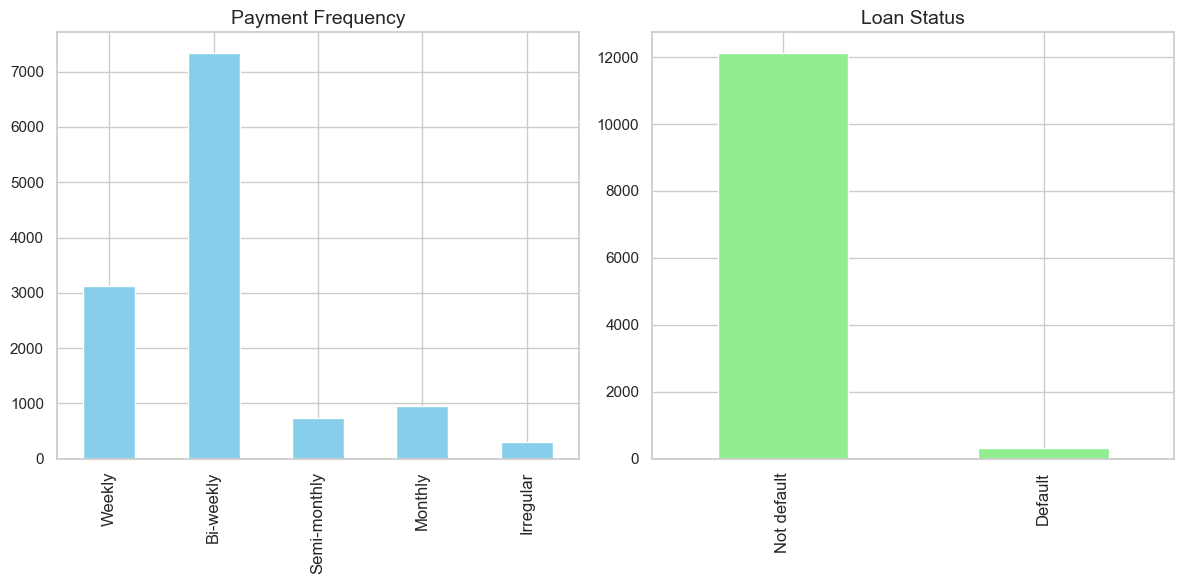

In [311]:
# Arrange the 2 figures side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Create payment frequency bar chart
df_copy.groupby(['payFrequency']).size().plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Payment Frequency', fontsize=14)
ax[0].set_xlabel('')

# Change the x axis label (0: Weekly; 1: Bi-weekly; 2: Semi-monthly; 3: Monthly; 4: Irregular)
ax[0].set_xticklabels(['Weekly', 'Bi-weekly', 'Semi-monthly', 'Monthly', 'Irregular'], fontsize=12)


# Create Loan status frequency bar chart 
# frequency of the loan status (0: Negative (Default); 1: Positive (Not default))
df_copy['target'].value_counts().plot(kind='bar', color='lightgreen', ax=ax[1])
ax[1].set_title('Loan Status', fontsize=14)
ax[1].set_xlabel('')

# Change the x axis label (Not default: 1; Default: 0)
ax[1].set_xticklabels(['Not default', 'Default'], fontsize=12)

# Prevent overlapping of plots
plt.tight_layout()
plt.show()


- Majority of the payment frequency is bi-weekly and weekly.
- Majority of the loan status is not default.

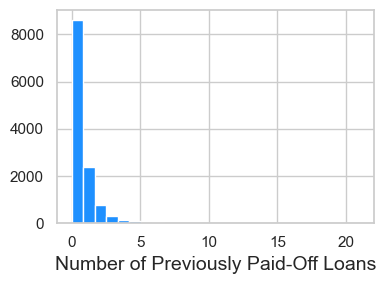

In [312]:
# Plot histogram for number of previously paid-off loans
plt.figure(figsize=(4, 3))
df_copy['nPaidOff'].plot(kind='hist', bins=25, color='dodgerblue')
plt.xlabel('Number of Previously Paid-Off Loans', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

Majority of the clients are first-timers or got the loan once.

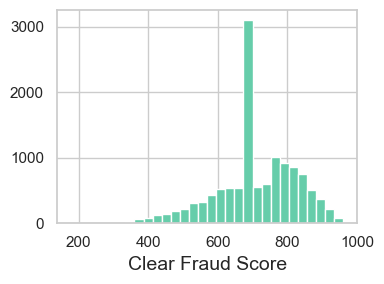

In [313]:
# Plot histogram for clear fraud score
plt.figure(figsize=(4, 3))
df_copy['clearfraudscore'].plot(kind='hist', bins=30, color='mediumaquamarine')
plt.xlabel('Clear Fraud Score', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

### Data visualizations about financial details of the loan (Principal, APR, Scheduled Payment Amount, Lead Cost)

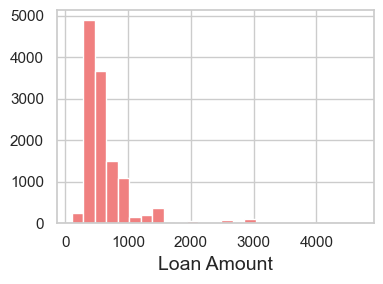

In [314]:
# Plot histogram for loan amount
plt.figure(figsize=(4, 3))
df_copy['loanAmount'].plot(kind='hist', bins=25, color='lightcoral')
plt.xlabel('Loan Amount', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

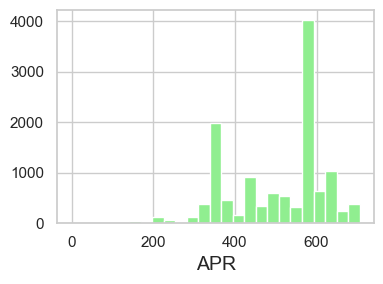

In [315]:
# Plot histogram for APR
plt.figure(figsize=(4, 3))
df_copy['apr'].plot(kind='hist', bins=25, color='lightgreen')
plt.xlabel('APR', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

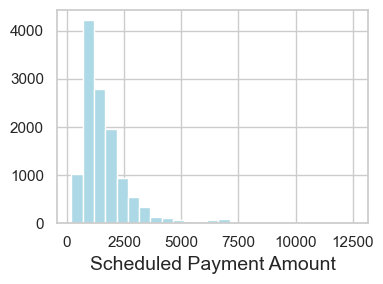

In [316]:
# Plot histogram for originally scheduled payment amount
plt.figure(figsize=(4, 3))
df_copy['originallyScheduledPaymentAmount'].plot(kind='hist', bins=25, color='lightblue')
plt.xlabel('Scheduled Payment Amount', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

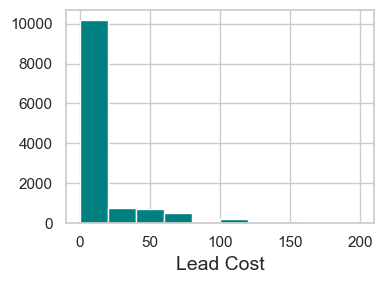

In [317]:
# Plot histogram for originally scheduled payment amount
plt.figure(figsize=(4, 3))
df_copy['leadCost'].plot(kind='hist', bins=10, color='teal')
plt.xlabel('Lead Cost', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()

Four of the histograms are heavily skewed. To overcome this, we need to normalize the data before the ML model development or choose a model that is able to handle skewed data effectively.

### Data Visualization about the time related matter of the loan applications

In [318]:
# Extract the time in (years, month, day, day of week, quarter) from the 'applicationDate' column
df_copy['application_year'] = df_copy['applicationDate'].dt.year
df_copy['application_month'] = df_copy['applicationDate'].dt.month
df_copy['application_day'] = df_copy['applicationDate'].dt.day
df_copy['application_day_of_week'] = df_copy['applicationDate'].dt.day_of_week
df_copy['application_quarter'] = df_copy['applicationDate'].dt.quarter

# create dictionary of days of a week
days = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# map the day of week to the name of the days
df_copy['application_day_of_week'] = df_copy['application_day_of_week'].map(days)
df

,loanId,anon_ssn,payFrequency,apr,applicationDate,originatedDate,nPaidOff,loanStatus,loanAmount,originallyScheduledPaymentAmount,...,leadType_express,leadType_instant-offer,leadType_lead,leadType_lionpay,leadType_organic,leadType_prescreen,leadType_rc_returning,leadType_repeat,target,time_apply_to_originate
0,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,1,199.0,2016-01-19 22:07:36.778,2016-01-20 15:49:18.846,0.0,Paid Off Loan,3000.0,6395.19,...,0,0,0,0,0,1,0,0,1.0,17.695000
1,LL-I-16519347,bc9fa73468acf18cb968a3a6a3c4697c,2,490.0,2017-01-31 17:48:17.381,2017-01-31 18:00:14.520,2.0,Paid Off Loan,1250.0,3313.78,...,0,0,0,0,1,0,0,0,1.0,0.199167
2,LL-I-11506719,10cefd11d41612b032fd9cd2debe32dc,1,590.0,2016-08-27 09:08:05.442,2016-08-29 15:05:04.014,0.0,Paid Off Loan,800.0,2432.08,...,0,0,0,0,0,0,0,0,1.0,5.949444
3,LL-I-09279047,1d249e27292d25e4d3b4bc142a2a4aea,0,404.1,2016-05-25 03:05:18.849,2016-05-25 15:11:36.260,3.0,Paid Off Loan,300.0,422.64,...,0,0,0,0,1,0,0,0,1.0,12.104722
4,LL-I-01316580,2a10b2e04c5eec9a47a8cf5b9b81a2b8,0,590.0,2015-05-26 17:02:27.312,2015-05-26 18:45:48.024,0.0,Paid Off Loan,300.0,896.87,...,0,0,0,0,0,0,0,0,1.0,1.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12456,LL-I-15390953,c81e355845a451b77c29b6515efa2578,1,645.0,2017-01-16 04:56:31.235,2017-01-16 05:30:10.885,0.0,Paid Off Loan,1500.0,5111.56,...,0,0,1,0,0,0,0,0,1.0,0.560833
12457,LL-I-12367915,55392b05f72f8c3e32e5157612406ba8,1,565.0,2016-12-01 16:57:49.231,2016-12-01 17:28:21.872,3.0,Paid Off Loan,600.0,1670.18,...,0,0,0,0,0,0,1,0,1.0,0.508889
12458,LL-I-15280684,73690518af906288434b2a0cfd972fe0,3,645.0,2017-01-14 19:43:08.685,2017-01-14 20:00:10.426,0.0,Paid Off Loan,375.0,1042.40,...,0,0,1,0,0,0,0,0,1.0,0.283611
12459,LL-I-09897110,0538f828b4a0b44502ead5a8033ee779,1,449.0,2016-06-22 01:10:50.110,2016-06-22 21:46:54.359,0.0,Paid Off Loan,400.0,664.12,...,0,0,1,0,0,0,0,0,1.0,20.601111


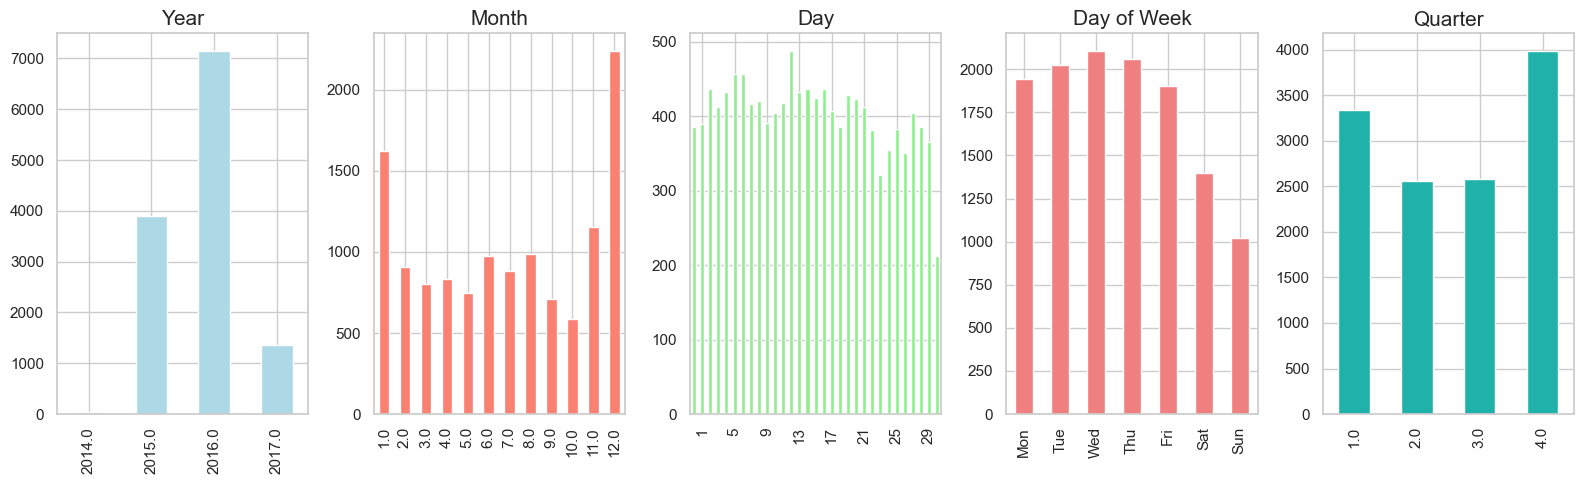

In [319]:
fig, ax = plt.subplots(1, 5, figsize=(16, 5))

# aggregate the years, months and days
df_copy.groupby(['application_year']).size().plot(kind='bar', color='lightblue', ax=ax[0])
df_copy.groupby(['application_month']).size().plot(kind='bar', color='salmon', ax=ax[1])
df_copy.groupby(['application_day']).size().plot(kind='bar', xticks=range(1, 31, 4), color='lightgreen', ax=ax[2])

# rearrange the day of a week order to Mon..Fri
df_copy.groupby(['application_day_of_week']).size().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).plot(kind='bar', color='lightcoral', ax=ax[3])

df_copy.groupby(['application_quarter']).size().plot(kind='bar', color='lightseagreen', ax=ax[4])

# set the titles of x & y axis
ax[0].set_title('Year', fontsize=15)
ax[0].set_xlabel('')
ax[1].set_title('Month', fontsize=15)
ax[1].set_xlabel('')
ax[2].set_title('Day', fontsize=15)
ax[2].set_xlabel('')
ax[3].set_title('Day of Week', fontsize=15)
ax[3].set_xlabel('')
ax[4].set_title('Quarter', fontsize=15)
ax[4].set_xlabel('')

plt.tight_layout()
plt.show()


In [320]:
# Get the years and their counts
year_counts_sorted = df_copy['application_year'].value_counts().sort_index()
print(year_counts_sorted)

application_year
2014.0      49
2015.0    3905
2016.0    7137
2017.0    1361
Name: count, dtype: int64


Based on the bar charts：
- In year chart, we noticed that the data in year 2014 and 2017 is significant lower than the other two years, the abnormality is due to incomplete of data
- The loan applications are higher in January and December, likely is due to the holiday season surge the demand for funds. So, Q1 and Q4 have higher applications due to it.

### Data Visualizations of the new features ( `time_apply_to_originate`)

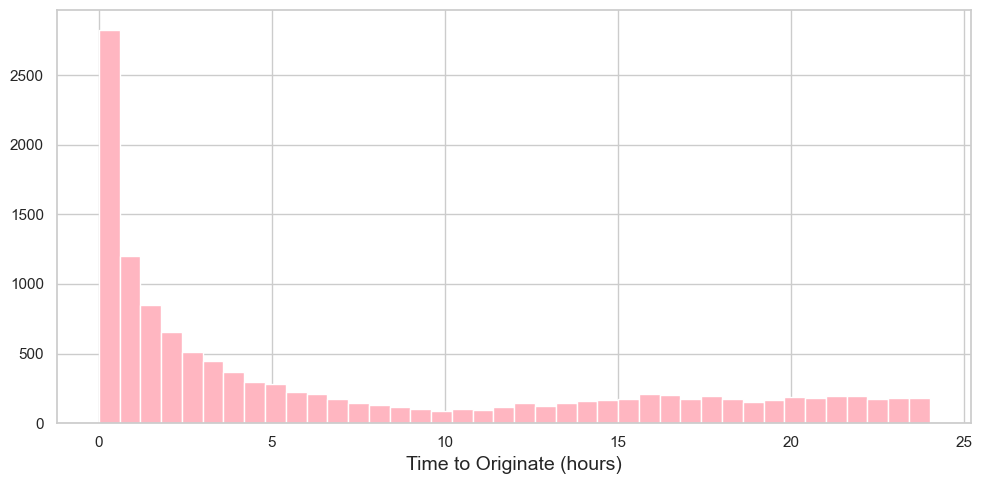

In [321]:
plt.figure(figsize=(10, 5))
df_copy['time_apply_to_originate'].plot(kind='hist', bins=40, color='lightpink')
plt.xlabel('Time to Originate (hours)', fontsize=14)
plt.ylabel('', fontsize=14) 

plt.tight_layout()
plt.show()


We can see that the figure is skewed to the right, with most loan applications are originated within few hours.

### Data Visualizations of the correlations of the features

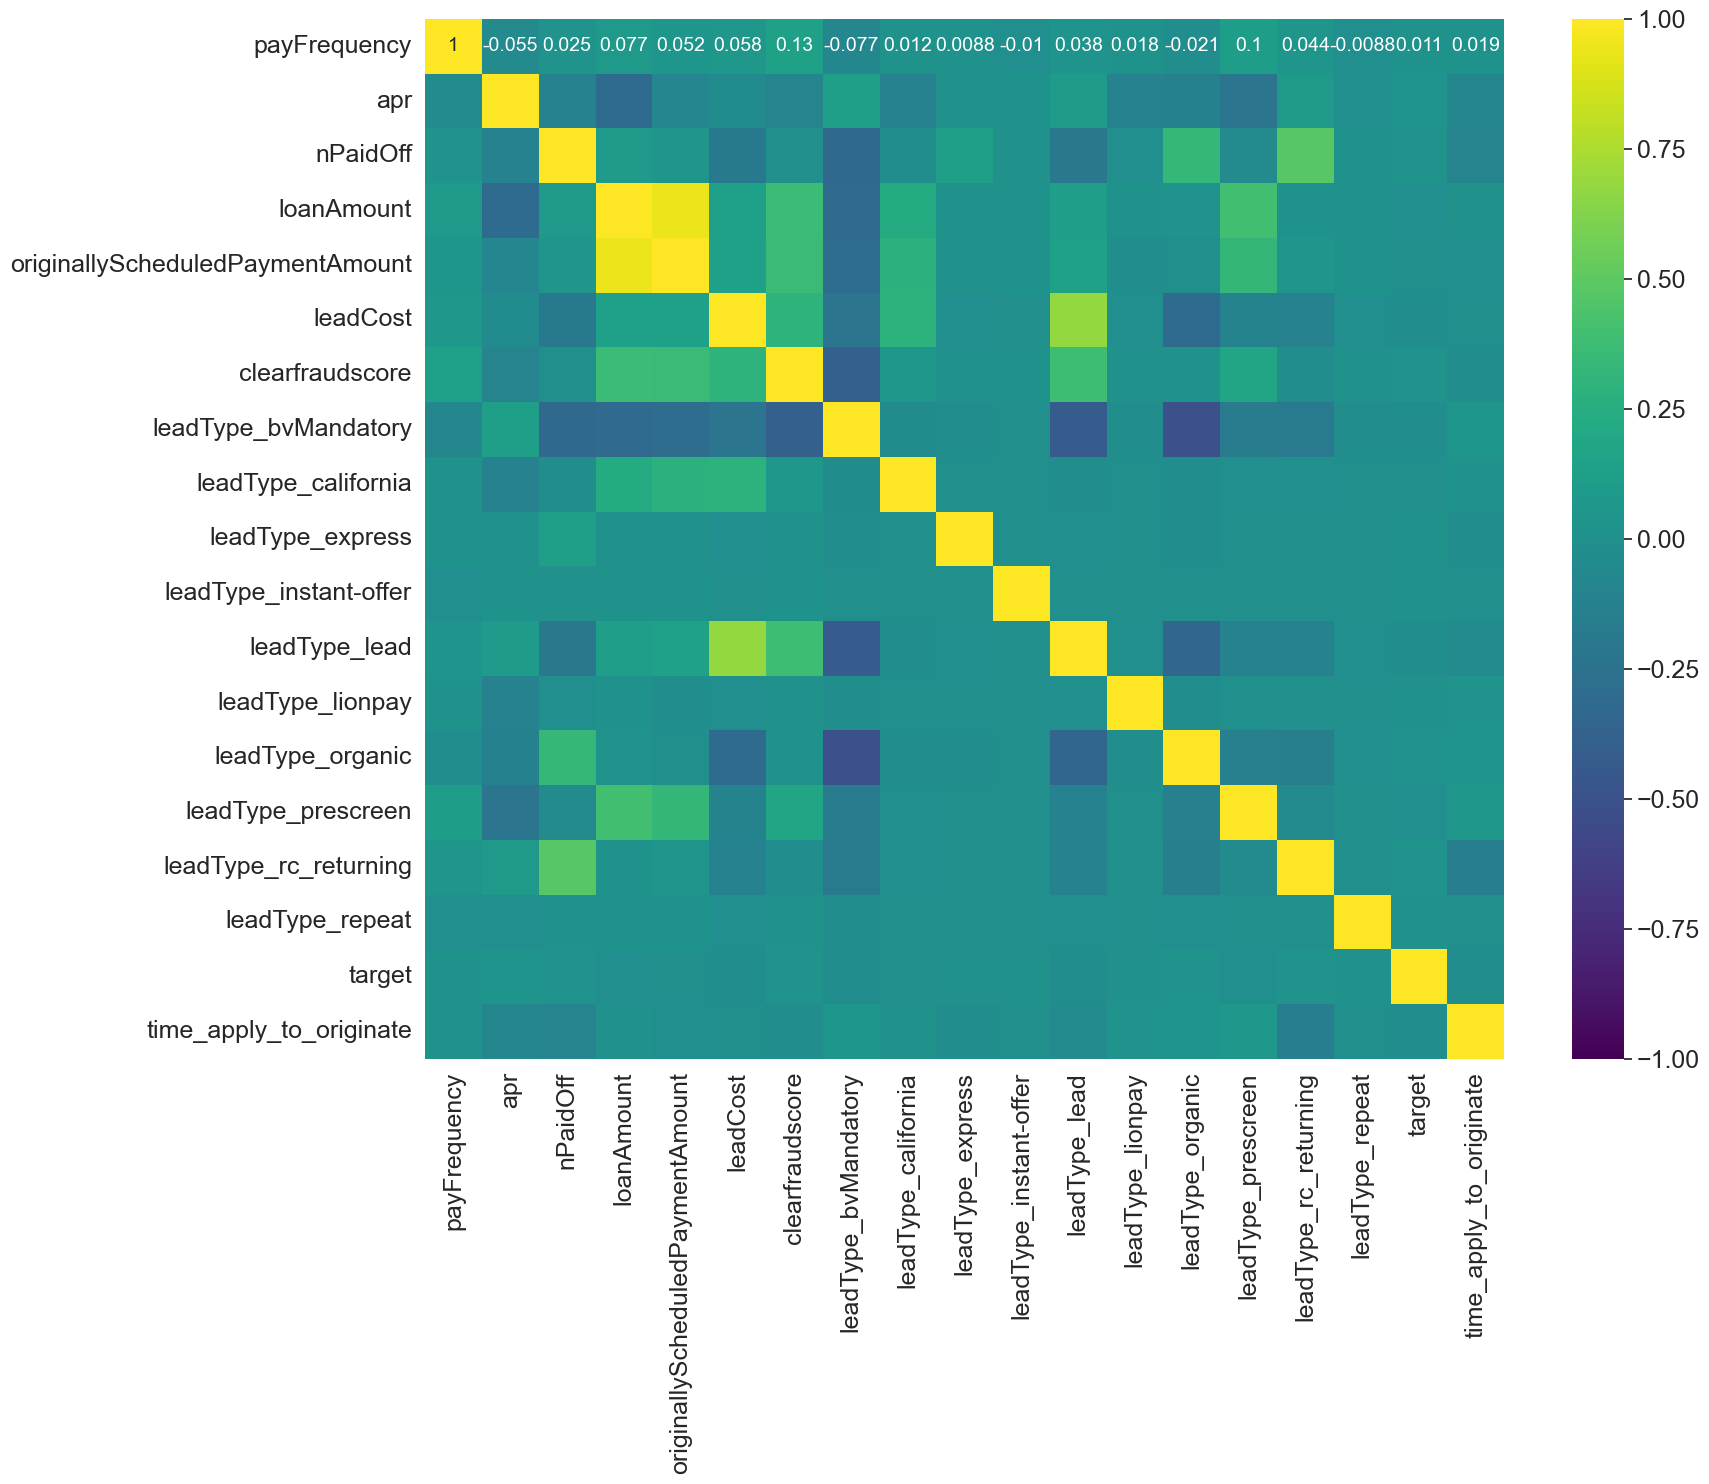

In [322]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
corr_heatmap = sns.heatmap(corr_matrix, vmin=-1.0, cmap='viridis', annot=True, annot_kws={"fontsize": 14})

# Set tick labels font size
corr_heatmap.set_xticklabels(corr_heatmap.get_xticklabels(), fontsize=18)
corr_heatmap.set_yticklabels(corr_heatmap.get_yticklabels(), fontsize=18)

# Adjust color bar tick labels
cbar = corr_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=18)

# Apply tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


Based on the heatmap:
- no significant correlation for any features
- Lead Type components have some positive and negative correlations within some of them, but the magnitudes are insignificant.
- It is worth to mention that the `loanAmount` and `originallyScheudledPaymentAmount` are highly correlated. We will considering drop the feature if the ML model eventually generating abnormal predictions due to it.

# Chapter 6: Model Development

In [323]:
df.columns.tolist()

['loanId',
 'anon_ssn',
 'payFrequency',
 'apr',
 'applicationDate',
 'originatedDate',
 'nPaidOff',
 'loanStatus',
 'loanAmount',
 'originallyScheduledPaymentAmount',
 'leadCost',
 'clearfraudscore',
 'leadType_bvMandatory',
 'leadType_california',
 'leadType_express',
 'leadType_instant-offer',
 'leadType_lead',
 'leadType_lionpay',
 'leadType_organic',
 'leadType_prescreen',
 'leadType_rc_returning',
 'leadType_repeat',
 'target',
 'time_apply_to_originate']

Since `applicationDate` and `originatedDate` is applied with feature engineering to turn into `time_apply_to_originate`, they can be dropped.

In [324]:
df.drop(columns=['applicationDate', 'originatedDate'], inplace=True)

### Normalization of data
Normalization on the features with skewed data is important in enhancing algorithm performance by ensuring that the features contribute equally to the model, preventing some features with **higher ranges** to influence the ML process, which result in biased results.

Based on the data visualizations:
- `nPaidOff`, `time_apply_to_originate`, `leadCost` is skewed to the right --> box-cox transformation --> reduce positive skewness, make the distribution closer to normal
- `clearfraudScore` has a shape close to normal distribution --> z-score standardization --> preserve the normal distribution
- `loanAmount`, `originallyScheduledPaymentAmount` have obvious outliers --> robust scaler --> robust scaler is less sensitive to outlier, ensuring the outliers do not disproportionately affect the distribution
- `apr` is having binomial distribution --> log transformation --> compress the range of values, making the distribution closer to normal

In [325]:
# Apply Box-Cox transformation
df['nPaidOff'], _ = boxcox(df['nPaidOff'] + 1)
df['leadCost'], _ = boxcox(df['leadCost'] + 1)

# Z-score standardization for features with normal distribution
mean, stdev = df['clearfraudscore'].mean(), df['clearfraudscore'].std()
df['clearfraudscore'] = (df['clearfraudscore'] - mean) / stdev

# Robust scaling for features with outliers
robust_scaler = RobustScaler()
df[['loanAmount', 'originallyScheduledPaymentAmount']] = robust_scaler.fit_transform(df[['loanAmount', 'originallyScheduledPaymentAmount']])

# Logarithmic transform for features with skewed distributions
df['apr'] = np.log(df['apr'])


During the transformation, we encountered error for `time_apply_to_originate` column and found out there is zero values in the column which is prohibited in **Box-Cox transformation**. Therefore, we will try to **add a small constant of 0.01** to all values to make them positive. It shouldn't has impact on the distribution of the data as the mean of data is **7.03**, which is much larger than **0.01**.

In [326]:
# Check for zero values
zero_values = (df['time_apply_to_originate'] == 0).sum()
if zero_values > 0:
    print("There are zero values in the 'time_apply_to_originate' column.")
else:
    print("There are no zero values in the 'time_apply_to_originate' column.")

# Inspect data range
min_value = df['time_apply_to_originate'].min()
mean_value = df['time_apply_to_originate'].mean()
max_value = df['time_apply_to_originate'].max()
print(f"Minimum value: {min_value}, Mean value: {mean_value}, Maximum value: {max_value}")


There are zero values in the 'time_apply_to_originate' column.
Minimum value: 0.0, Mean value: 7.034489758089011, Maximum value: 23.998333333333335


However, it still encountered error after adding a small constant to the data. We move on to the log transformation which is also effective at reducing right skewness due to the time constraint. If time was not a constraint, we should deep dive into it to debug.

In [365]:
# Apply logarithmic transformation
transformed_values = np.log1p(df['time_apply_to_originate'])
df['time_apply_to_originate'] = transformed_values
df.dropna(subset=['time_apply_to_originate'], inplace=True)

In [366]:
min_value2 = df['apr'].min()
print(min_value2)

3.4008639927609177


We found out there is row that contains '-inf' value in `apr` column, we need to find it and drop the rows to prevent error.

In [367]:
# Find indices of rows with '-inf' in the 'apr' column
inf_indices = df.index[df['apr'] == float('-inf')]
print(inf_indices)

Index([], dtype='int64')


In [368]:
df.drop(inf_indices, inplace=True)

Now, we check the stats of the features, and their distribution

In [369]:
features = ['loanAmount', 'originallyScheduledPaymentAmount', 'apr', 'clearfraudscore', 'nPaidOff', 'leadCost', 'time_apply_to_originate']
df[features].describe()

,loanAmount,originallyScheduledPaymentAmount,apr,clearfraudscore,nPaidOff,leadCost,time_apply_to_originate
count,12437.000000,12437.000000,12437.000000,12437.000000,12437.000000,12437.000000,12437.000000
mean,0.369777,0.360876,6.199039,-0.000092,0.108203,1.113263,0.579355
std,1.291458,1.211357,0.279770,1.000272,0.162120,0.975083,0.262517
min,-1.142857,-1.122540,3.400864,-4.591849,0.000000,0.000000,0.000000
25%,-0.428571,-0.355582,5.966147,-0.470564,0.000000,0.000000,0.358654
50%,0.000000,0.000181,6.336826,-0.142930,0.000000,1.192430,0.637426
75%,0.571429,0.644287,6.380123,0.727886,0.328587,1.857130,0.834866
max,11.962857,11.320382,6.559034,2.167749,0.398473,3.109518,0.891815


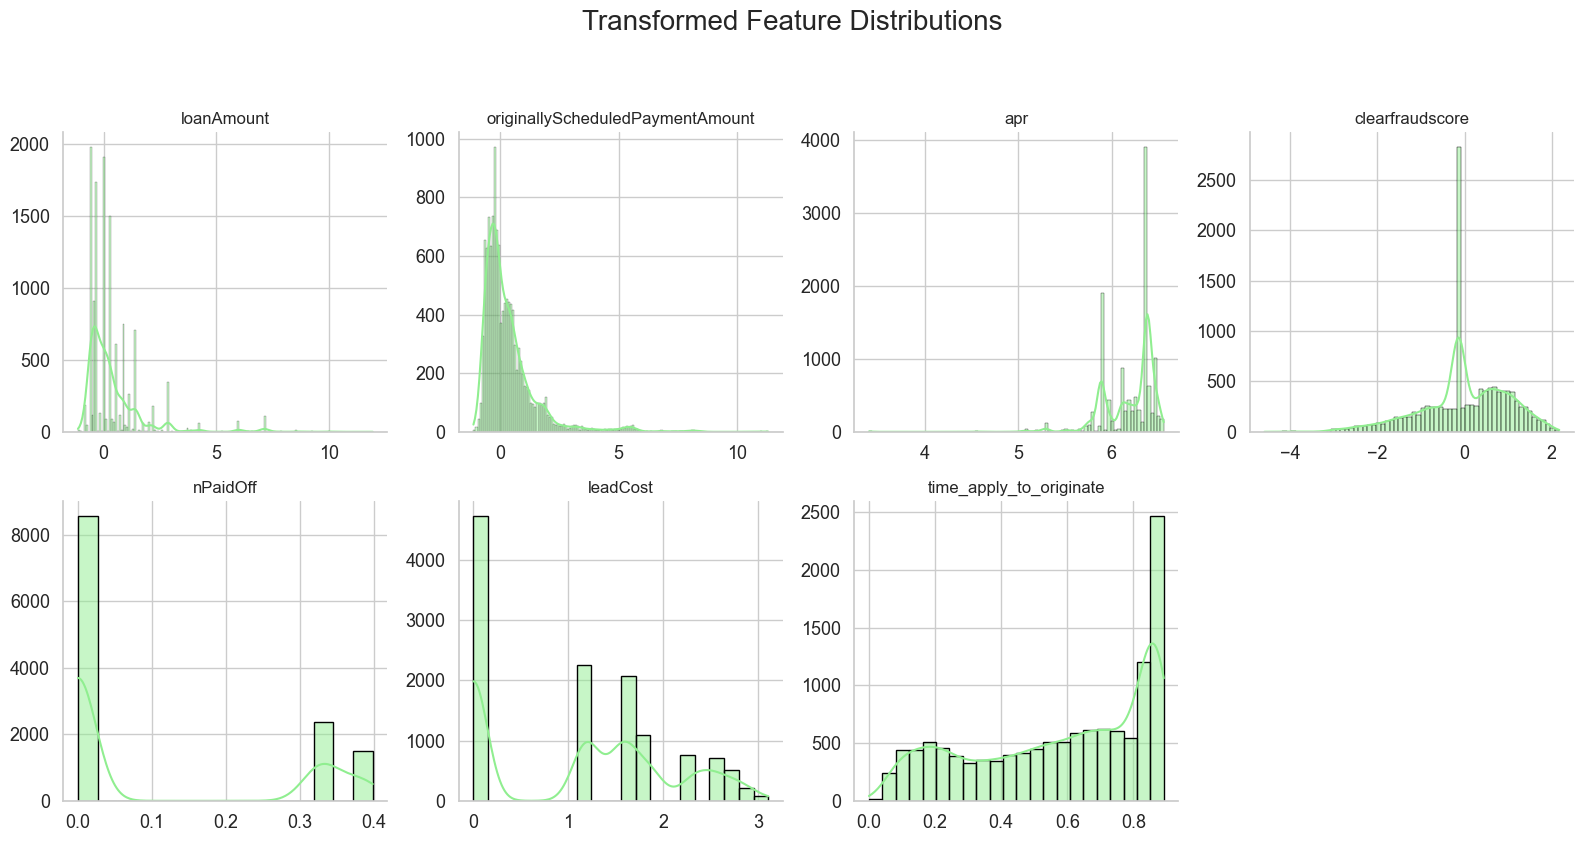

In [370]:
# Melt the dataframe
df_pivot = df[features].melt(var_name='variable', value_name='value')

# Create facet grid
g = sns.FacetGrid(df_pivot, col='variable', col_wrap=4, height=4, sharex=False, sharey=False)

# Map histogram plot to each facet
g = g.map(sns.histplot, 'value', bins='auto', kde=True, color='lightgreen', edgecolor='black')

# Set titles
g.set_titles('{col_name}', fontsize=16)

# Set axis labels
g.set(xlabel='', ylabel='')

# Set font sizes
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelsize=13)
    ax.tick_params(axis='y', labelsize=13)

# Set suptitle
plt.suptitle('Transformed Feature Distributions', fontsize=20, y=1.05)

# Adjust layout and save/show plot
g.tight_layout()
plt.show()

Based on the data visualizations, 
* nPaidOff time_apply_to_originate, leadCost right skewness is adjusted
* clearfraudScore normal distribution is preserved
* loanAmount originallyScheduledPaymentAmount outliers are less impactful with new scaling
* apr looks more towards the shape of normal distributionormal

In previous chapter, we mentioned the class imbalance of the target variable. Oversampling is used to overcome the class imbalance.

In [371]:
x = df.drop(['loanId', 'anon_ssn', 'target','loanStatus'], axis=1)
y = df['target']

# the class percentage of 0 and 1 before balancing
print(f'Class distribution before balancing: \n{y.value_counts(normalize=True).apply(lambda x: f"{x * 100:.2f}%")}\n')

# implementing oversampling on the class distribution
ros = RandomOverSampler(random_state=11)
x_resampled, y_resampled = ros.fit_resample(x, y)

#  the class distribution after oversampling
print(f'Class distribution after balancing: \n{y_resampled.value_counts(normalize=True).apply(lambda x: f"{x * 100:.2f}%")}\n')


Class distribution before balancing: 
target
1.0    97.39%
0.0     2.61%
Name: proportion, dtype: object

Class distribution after balancing: 
target
1.0    50.00%
0.0    50.00%
Name: proportion, dtype: object



## 6.1 Splitting train data and test data

25% of the data is used to test the model, and 75% of it goes to train the data

In [372]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=42)

We will now choosing the most suitable ML model to be used. The type of model we will use is binary classification model as the target variables are binary values (0 and 1). Here is some binary classification models that are under consideration.
1. Logistic regression
2. Support vector machines
3. Decision trees
4. Random forest

These model will be trained and we will use the ROC-AUC as the indicator for the model performance. The model with the highest score of ROC-AUC will be chosen as the most optimum model.

## 6.2 Model Training & Evaluation

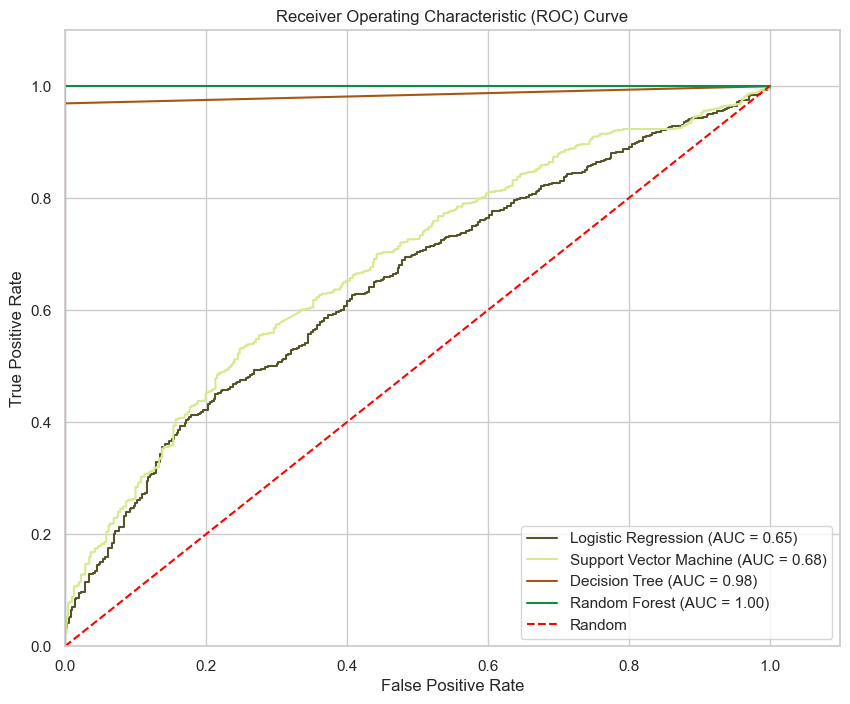

In [376]:
import random

# Instantiate the classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train each model and plot ROC curve
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(x_train, y_train)
    y_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    # Generate a random color
    color = (random.random(), random.random(), random.random())
    plt.plot(fpr, tpr, color=color, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Random forest model is used.
Random forest's ROC is the highest among all, therefore it will be chosen as our model.

## 6.3 Analysis on the distribution of the importance of the features in `Random Forest model`

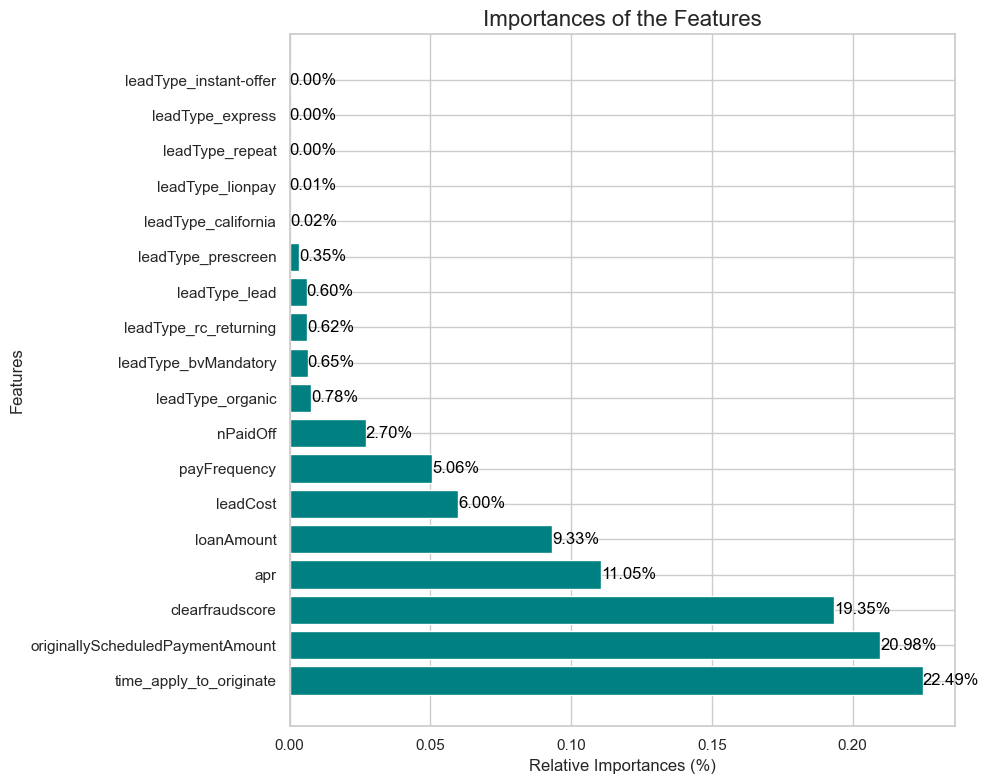

In [389]:
random_forest_model = models['Random Forest']

# Calculate feature importances
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the Importances of the Features
plt.figure(figsize=(10, 8))
plt.title('Importances of the Features', fontsize=16)
plt.barh(range(x.shape[1]), importances[indices], align='center', color='teal')

# Add feature names on the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')

plt.xlabel('Relative Importances (%)')
plt.ylabel('Features')
plt.yticks(range(x.shape[1]), x.columns[indices])
plt.tight_layout()
plt.show()


From the bar chart:
* the `leadType` features are not important to the model.
* `loanAMount`, `apr`,`clearfraudscore`, and `originallyScheduledPaymentAmount` are much more important in the model. `clearfraudscore` is the score produced by underwriters which is credible and obviously is a great factor in deciding the loan approval.
* The new feature from the feature engineering, `time_apply_to_originate`, which represents the time taken from the loan application until the loan is originated is the most significant feature to the model. Since this is the largest deciding factor, we need to explore more on the reason behind it.

## 6.4 Partial Dependence Plots (PDPs) of the features
PDPs reveals the relationship between the features and the predicted outcome of the model, while the other features are kept constant. We will be constructing PDPs for the top 5 biggest factor in the model in order to understand the impact of individual features on the model's predictions.

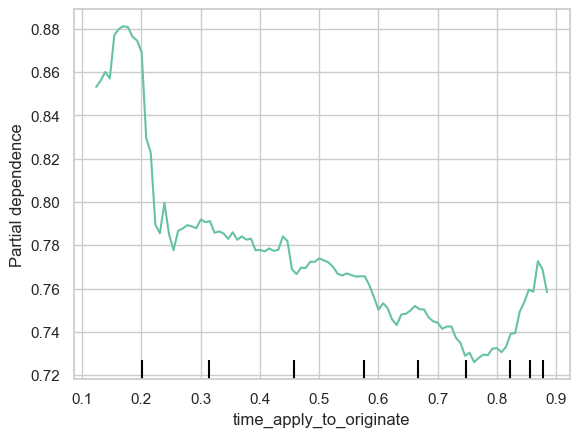

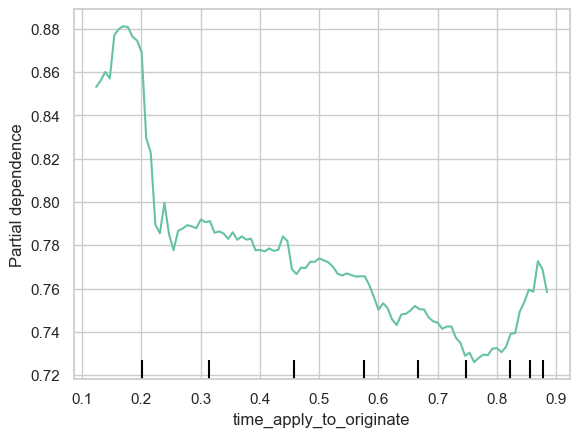

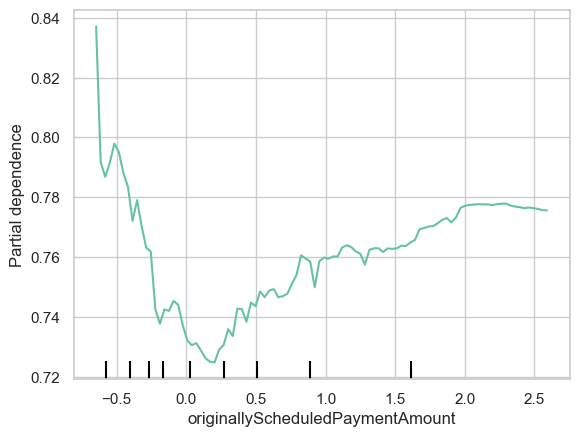

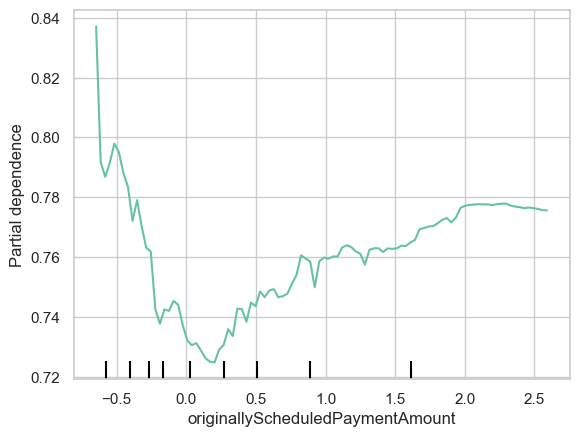

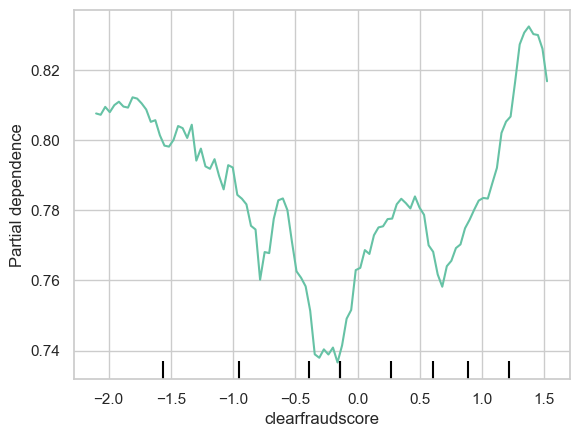

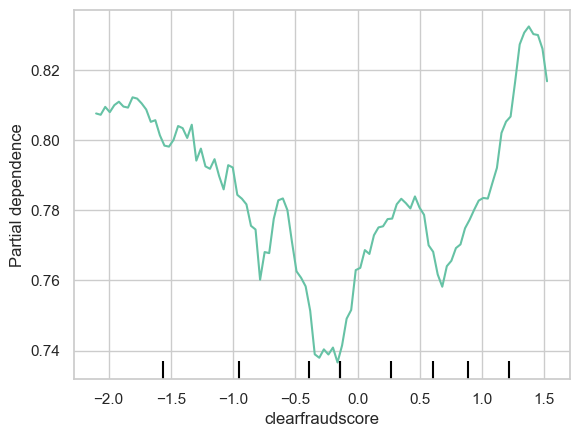

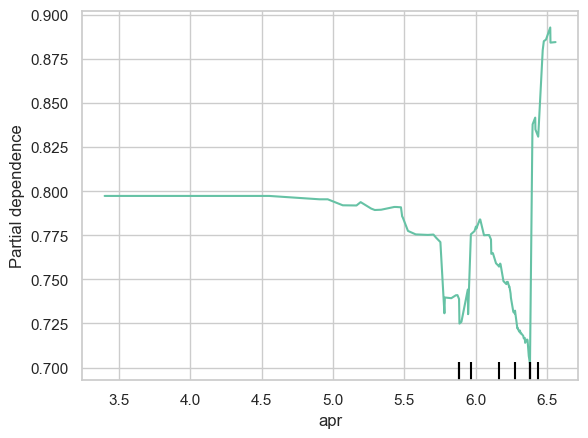

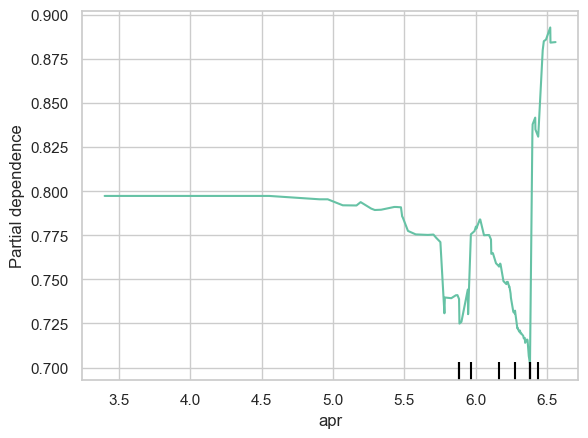

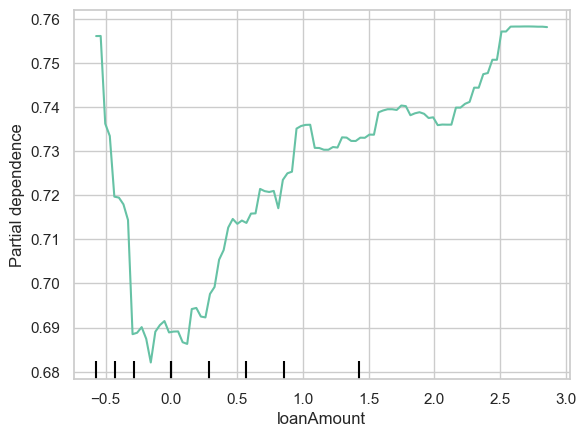

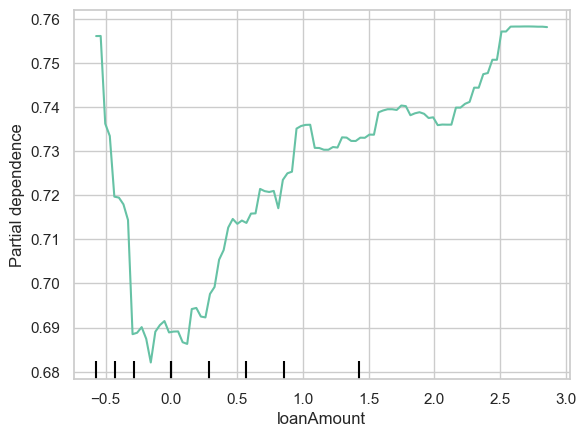

In [449]:
from sklearn.inspection import PartialDependenceDisplay

top_features = indices[:5]

# Create PartialDependenceDisplay for the top 5 most important features
for feature_index in top_features:
    pdp_display = PartialDependenceDisplay.from_estimator(
        random_forest_model, x_train, features=[feature_index], feature_names=x.columns
    )
    pdp_display.plot()


Based on the PDP, 
- the longer `the time taken to originate`, the higher the chance the loan get defaulted. It is suspected that the client with better profile can pass through automated loan inspection without intervention of manual inspection.
- For the `scheduled payment amount`, `loan amount` and `apr`, the higher of it, the higher the chance the loan get defaulted. It is not surprising as the higher the commitment of the loan, the easier it gets defaulted.
- The higher the `clearfraudscore`, the higher the chance the loan get defaulted. It fits the representation of clear fraud score.

# Chapter 7: Conclusion

In this data analysis and machine learning process, we are able to extract the insights in the view of business from the data. We explored the data and used the data to engineer new features to aid the machine learning model development. Then, we have chosen Random Forest Model among other suitable models. With the ROC-AUC score of 100%, the model is indeed the most optimum model. 

**Insights:**
1. From the Random Forest model, the top 5 factors in risk assessment of loan application is **Time taken from application to origination (22.49%)**, followed by **Originally Scheduled Payment Amount (20.98%)**, **Clear Fraud Score (19.35%)**, **APR (11.05%)**, and **Loan Amount (9.33%)**.
2. The various features of `leadType` is not significant in risk assessment of loan application.

**Recommendations/ Improvements:**
1. **Further features engineering** - to acquire additional features could be done, to obtain more comprehensive model.
2. **Utilization of `payment.csv`** - `payment.csv` contains `paymentStatus`, `isCollection` that might be useful for feature engineering. However, it needs to be handled carefully to avoid target leakage as the data is not available at the time of prediction.
3. **More data about client's financial background** - More data about the client's financial background is helpful to improve the model, e.g., Income, Credit Score, Debt Service Ratio (DSR) and Loan purpose.